# Ancestry analysis
- upset
- aFC between populations

### 1. eGene upsetR

In [1]:
library(tidyverse)
library(data.table)
library(UpSetR)

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘hms’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [90]:
all <- fread("../results/mixed_perm_90hcp/sig_pheno.txt", data.table = F)
eur <- fread("../results/eur_perm_50HCP/sig_pheno.txt", data.table = F)
amr <- fread("../results/amr_perm_15HCP/sig_pheno.txt", data.table = F)
afr <- fread("../results/afr_perm_25HCP/sig_pheno.txt", data.table = F)

In [5]:
genes <- list(ALL = unique(all$pid),
              EUR = unique(eur$pid),
              AMR = unique(amr$pid),
              AFR = unique(afr$pid))

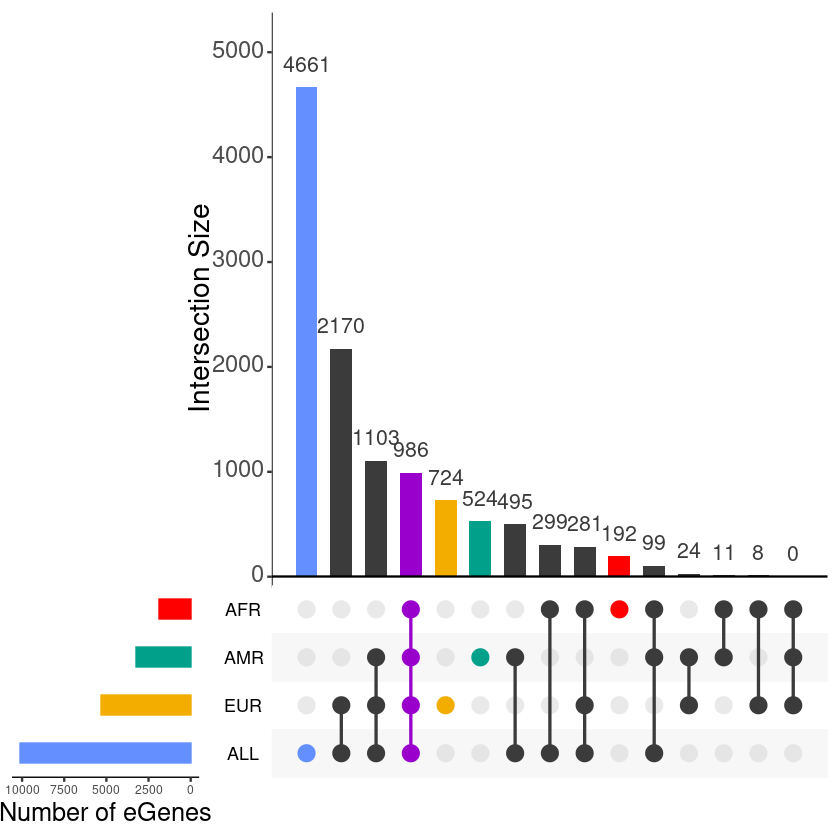

In [7]:
upset(fromList(genes), order.by = "freq",
      sets.bar.color = c("#648FFF", "#F2AD00", "#00A08A", "#FF0000"),
      empty.intersections = "on",
      sets.x.label = "Number of eGenes",
      point.size = 4.5,
      queries = list(list(query = intersects, params = list("AFR","AMR","EUR","ALL"),
                          color = "#9900CC", active = T),
                     list(query = intersects, params = list("AFR"),
                          color = "#FF0000", active = T),
                     list(query = intersects, params = list("AMR"),
                          color = "#00A08A", active = T),
                     list(query = intersects, params = list("EUR"),
                          color = "#F2AD00", active = T),
                     list(query = intersects, params = list("ALL"),
                          color = "#648FFF", active = T)),
      text.scale = c(2, 2, 1.8, 1, 1.5, 2))

In [8]:
pdf(file = "../figures/upsetr_egene.pdf", onefile = F)

upset(fromList(genes), order.by = "freq",
      sets.bar.color = c("#648FFF", "#F2AD00", "#00A08A", "#FF0000"),
      empty.intersections = "on",
      sets.x.label = "Number of eGenes",
      point.size = 4.5,
      queries = list(list(query = intersects, params = list("AFR","AMR","EUR","ALL"),
                          color = "#9900CC", active = T),
                     list(query = intersects, params = list("AFR"),
                          color = "#FF0000", active = T),
                     list(query = intersects, params = list("AMR"),
                          color = "#00A08A", active = T),
                     list(query = intersects, params = list("EUR"),
                          color = "#F2AD00", active = T),
                     list(query = intersects, params = list("ALL"),
                          color = "#648FFF", active = T)),
      text.scale = c(2, 2, 1.8, 1, 1.5, 2))
dev.off()

png 
  2

### 2: Effect size
I first tried this, y axis does not have to be significant
- `Snakefile` `make_effect_size_scatter_eur_amr`, `eur_afr`, `afr_amr`: all nominal associations

Then this. There are reversed effect sizes/off-diagonal points
- `Snakefile` `scatter_eur_afr`, `eur_amr`, `afr_amr`: x-axis pop1 permutation eGene-eQTL, y-axis colored by nominally sig and non-sig

Calculated aFC for eur, amr, afr nominal eQTL. A few permutation eQTL are not nominally significant, exclude these.
- reverse effect size variants have swapped REF/ALT between populations. `*(-1)` for these
- some variants are near y-axis. Checked one example, small MAC. But somehow they don't show up on beta scatter plot? Remove these
- FINAL: remove all variants with MAC<10 in any of the populations, remove variants with unmatched REF/ALT (flipped, or for a few, different alleles)

In [91]:
eur_afc_sig <- fread("../results/eur_nominal_50HCP/aFC_boot100.txt", data.table = F)
eur_afc_all <- fread("../results/eur_nominal_50HCP/amr_afr_perm_eqtl_in_eur_aFC_boot100.txt", data.table = F)
amr_afc <- fread("../results/amr_nominal_15HCP/aFC_boot100.txt", data.table = F)
afr_afc <- fread("../results/afr_nominal_25HCP/aFC_boot100.txt", data.table = F)

In [4]:
# eur_afc_sig <- eur_afc_sig %>% filter(pid != "pid")
# eur_afc_all <- eur_afc_all %>% filter(pid != "pid")
# amr_afc <- amr_afc %>% filter(pid != "pid")
# afr_afc <- afr_afc %>% filter(pid != "pid")
# write.table(eur_afc_sig, "../results/eur_nominal_50HCP/aFC_boot100.txt", col.names = T, row.names = F, quote = F, sep = "\t")
# write.table(eur_afc_all, "../results/eur_nominal_50HCP/amr_afr_perm_eqtl_in_eur_aFC_boot100.txt", col.names = T, row.names = F, quote = F, sep = "\t")
# write.table(amr_afc, "../results/amr_nominal_15HCP/aFC_boot100.txt", col.names = T, row.names = F, quote = F, sep = "\t")
# write.table(afr_afc, "../results/afr_nominal_25HCP/aFC_boot100.txt", col.names = T, row.names = F, quote = F, sep = "\t")

### 2-1: AMR-EUR

In [92]:
amr <- amr %>% unite("gene_qtl", pid, sid, sep = ":", remove = FALSE)

In [93]:
amr_afc <- amr_afc %>% unite("gene_qtl", pid, sid, sep = ":", remove = FALSE)

In [94]:
sum(unique(amr$gene_qtl) %in% unique(amr_afc$gene_qtl))
length(unique(amr$gene_qtl)) # not all perm gene_qtl is nominally sig?

[1] 3236

[1] 3242

In [95]:
# keep permutation egene-eQTL pairs only
amr_afc <- amr_afc %>% filter(gene_qtl %in% amr$gene_qtl)
dim(amr_afc)

[1] 3236   12

In [96]:
eur_afc_all <- eur_afc_all %>% unite("gene_qtl", pid, sid, sep = ":", remove = FALSE)

In [97]:
dim(eur_afc_all)

[1] 3933    8

In [98]:
# keep gene-eQTL pairs that are AMR permutation sig
eur_afc_all_amr <- eur_afc_all %>% filter(gene_qtl %in% amr_afc$gene_qtl)
dim(eur_afc_all_amr)

[1] 2729    8

In [99]:
eur_afc_sig <- eur_afc_sig %>% unite("gene_qtl", pid, sid, sep = ":", remove = FALSE)
sum(eur_afc_sig$gene_qtl %in% eur_afc_all_amr$gene_qtl)

[1] 1663

In [100]:
eur_afc_all_amr <- eur_afc_all_amr %>% mutate(sig = ifelse(gene_qtl %in% eur_afc_sig$gene_qtl,
                                                           "EUR nominal eQTL", "EUR non-significant"))

In [101]:
head(eur_afc_all_amr)
table(eur_afc_all_amr$sig)

,gene_qtl,pid,sid,sid_chr,sid_pos,log2_aFC,log2_aFC_lower,log2_aFC_upper,sig
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000000460:rs12064636,ENSG00000000460,rs12064636,1,169807621,-0.25445216,-0.29937762,-0.17135050,EUR nominal eQTL
2,ENSG00000001460:rs4592213,ENSG00000001460,rs4592213,1,24741819,-1.05536798,-1.40243569,-0.81121994,EUR nominal eQTL
3,ENSG00000001461:rs527567,ENSG00000001461,rs527567,1,24711120,-0.18325745,-0.24763059,-0.10400362,EUR nominal eQTL
4,ENSG00000011009:rs72655556,ENSG00000011009,rs72655556,1,23217443,-0.03651043,-0.22019587,0.08392405,EUR non-significant
5,ENSG00000033122:rs4650137,ENSG00000033122,rs4650137,1,69685100,-0.09780169,-0.13436798,-0.05906543,EUR nominal eQTL
6,ENSG00000041988:chr1:6610579,ENSG00000041988,chr1:6610579,1,6670639,0.01645603,-0.02992298,0.06722265,EUR non-significant



   EUR nominal eQTL EUR non-significant 
               1663                1066 

In [102]:
amr_eur <- amr_afc %>% 
select(gene_qtl, pid, sid, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>%
inner_join(eur_afc_all_amr, by = "gene_qtl") %>%
select(gene_qtl, pid.x, sid.x, log2_aFC.x, log2_aFC_lower.x, log2_aFC_upper.x, 
                              log2_aFC.y, log2_aFC_lower.y, log2_aFC_upper.y, sig)

In [103]:
dim(amr_eur)

[1] 2729   10

In [104]:
cols.num <- c("log2_aFC.x", "log2_aFC_lower.x", "log2_aFC_upper.x",
              "log2_aFC.y", "log2_aFC_lower.y", "log2_aFC_upper.y")
amr_eur[cols.num] <- sapply(amr_eur[cols.num],as.numeric)

In [105]:
cols <- c("EUR nominal eQTL" = "#00A08A",
          "EUR non-significant" = "#C5FCEE")

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 29 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”


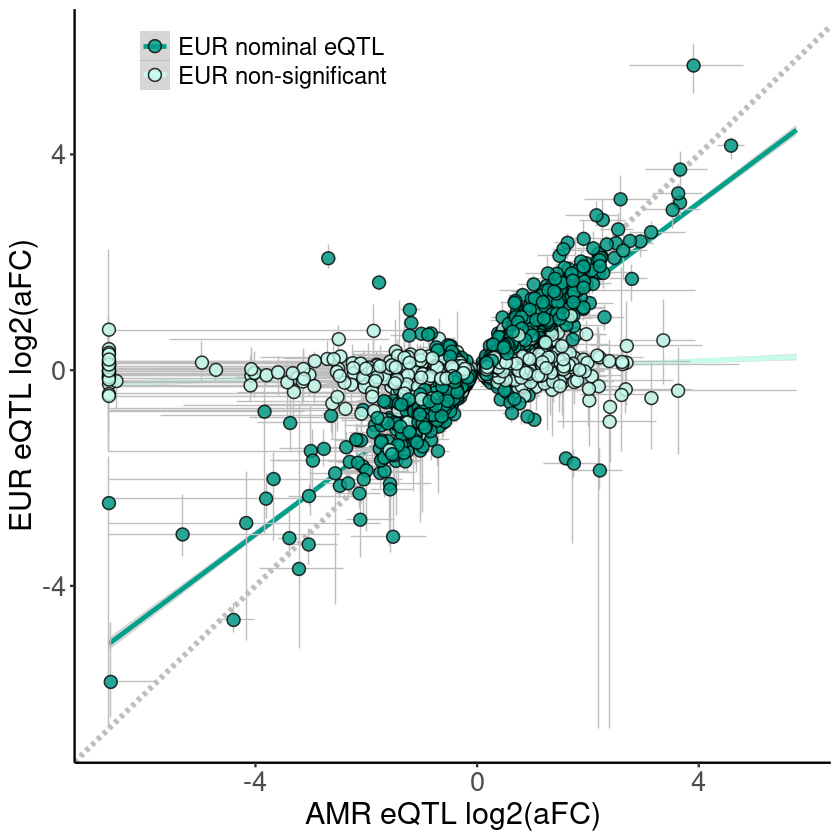

In [45]:
ggplot(amr_eur, aes(x = log2_aFC.x, y = log2_aFC.y)) +
    geom_abline(intercept = 0, slope = 1, color = "grey", linetype = "dashed", size = 1.2) +
    geom_smooth(method = "lm", fullrange = TRUE, aes(color = sig)) +
    geom_pointrange(aes(xmin = log2_aFC_lower.x, xmax = log2_aFC_upper.x), 
                  colour = "grey", size = .3) +
    geom_pointrange(aes(ymin = log2_aFC_lower.y, ymax = log2_aFC_upper.y), 
                  colour = "grey", size = .3) +
    geom_point(size = 3, aes(fill = sig), alpha = 0.8, shape = 21) +
    labs(x = "AMR eQTL log2(aFC)", y = "EUR eQTL log2(aFC)") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.position = c(0.25, 0.95)) +
    scale_color_manual(values = cols, name = "") +
    scale_fill_manual(values = cols, name = "")

### 2-1-1: Investigate the points near y axis
- some (5 out of 25) have low MAC. Keep only variants that pass MAC>10 in both EUR and AMR
- why same numbers aFC and bounds in AMR?

In [15]:
test <- amr_eur %>% filter(log2_aFC.x < -6, sig == "EUR non-significant")
dim(test)
head(test)

[1] 25 10

,gene_qtl,pid.x,sid.x,log2_aFC.x,log2_aFC_lower.x,log2_aFC_upper.x,log2_aFC.y,log2_aFC_lower.y,log2_aFC_upper.y,sig
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000121454:rs902169365,ENSG00000121454,rs902169365,-6.643856,-6.643856,-6.643856,0.75062314,-0.1390696,2.2412609,EUR non-significant
2,ENSG00000060718:rs78245241,ENSG00000060718,rs78245241,-6.643856,-6.643856,-6.643856,-0.08927556,-0.3837025,0.2019564,EUR non-significant
3,ENSG00000270562:rs116695663,ENSG00000270562,rs116695663,-6.643856,-6.643856,-6.643856,-0.11285620,-0.4733802,0.2202849,EUR non-significant
4,ENSG00000251244:chr4:155818872,ENSG00000251244,chr4:155818872,-6.643856,-6.643856,-6.643856,-0.13977139,-0.7237100,0.2610060,EUR non-significant
5,ENSG00000286599:rs74903752,ENSG00000286599,rs74903752,-6.643856,-6.643856,-6.643856,0.10903218,-0.3536229,0.5546544,EUR non-significant
6,ENSG00000170549:rs75455885,ENSG00000170549,rs75455885,-6.643856,-6.643856,-6.643856,-0.25947120,-0.6080685,0.1074340,EUR non-significant


In [20]:
sum(test$log2_aFC.x == test$log2_aFC_lower.x)
sum(test$log2_aFC.x == test$log2_aFC_upper.x)

[1] 24

[1] 24

**Do they also have near y-axis betas?**

In [56]:
# need beta for eur non sig
# test <- test %>% left_join(amr, by = "gene_qtl") %>% left_join(eur_afc_sig, by = "gene_qtl")

In [58]:
# ggplot(test, aes(x = slope.x, y = slope.y)) +
# geom_point() +
# labs(x = "AMR slope", y = "EUR slope")

In [57]:
# ggplot(reverse, aes(x = log2_aFC.x, y = log2_aFC.y)) +
# geom_point() +
# labs(x = "AMR log2aFC", y = "EUR log2aFC")

**Load gene expression and dosage**
- extracted variant dosage

In [2]:
eur_expr <- fread("../data/eur/genes.280.bed.gz", data.table = F)
amr_expr <- fread("../data/amr/genes.162.bed.gz", data.table = F)

In [73]:
# eur_dosage <- fread("../../genotype/all_data/isec_R2_greater_than_3/ancestry/eur/filtered.hg19.sorted.removeGeneOutlier.dose.tsv.gz",
#                    data.table = F)

In [74]:
# amr_dosage <- fread("../../genotype/all_data/isec_R2_greater_than_3/ancestry/amr/filtered.hg19.sorted.removeGeneOutlier.dose.tsv.gz",
#                    data.table = F)

In [3]:
eur_expr_ENSG00000121454 <- eur_expr %>% filter(ID == "ENSG00000121454")
amr_expr_ENSG00000121454 <- amr_expr %>% filter(ID == "ENSG00000121454")

In [4]:
eur_dosage_rs902169365 <- read.table("../../genotype/all_data/isec_R2_greater_than_3/ancestry/eur/rs902169365_dose.tsv", check.names = F, header = T)
amr_dosage_rs902169365 <- read.table("../../genotype/all_data/isec_R2_greater_than_3/ancestry/amr/rs902169365_dose.tsv", check.names = F, header = T)

In [6]:
df <- data.frame("ENSG00000121454 expr, no cov" = c(as.numeric(eur_expr_ENSG00000121454[1,5:ncol(eur_expr_ENSG00000121454)]),
                                                    as.numeric(amr_expr_ENSG00000121454[1,5:ncol(amr_expr_ENSG00000121454)])),
                "Population" = c(rep("EUR", 280), rep("AMR", 162)),
                "rs902169365" = c(as.numeric(eur_dosage_rs902169365[1, 5:ncol(eur_dosage_rs902169365)]),
                                  as.numeric(amr_dosage_rs902169365[1, 5:ncol(amr_dosage_rs902169365)])))

In [8]:
table(df$Population, df$rs902169365)

     
        0   1
  AMR 155   7
  EUR 273   7

In [33]:
2*(280+162)
7/(162*2)
7/(280*2)


[1] 884

[1] 0.02160494

[1] 0.0125

In [10]:
14/884

[1] 0.0158371

In [11]:
df$rs902169365 <- as.factor(df$rs902169365)

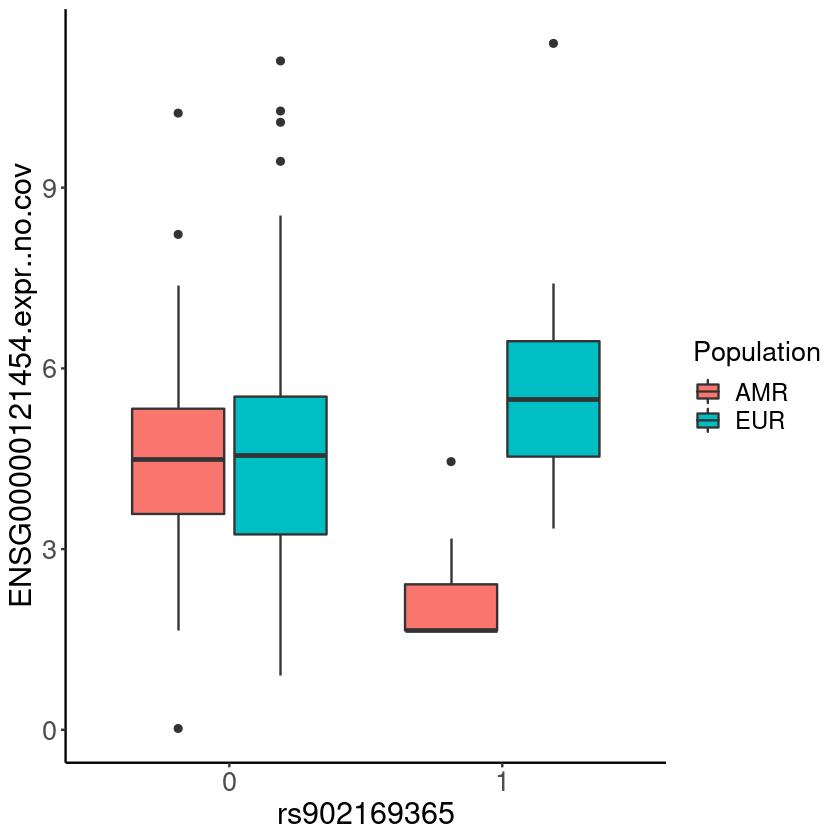

In [13]:
ggplot(df, aes(x = rs902169365, y = ENSG00000121454.expr..no.cov, fill = Population)) +
geom_boxplot() +
theme_classic() +
theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.title = element_text(size = 16))

**Regress expression by covariates**

In [16]:
amr_cov <- read.table("../data/amr/15HCP_cov_final.txt", header = T, check.names = F)
eur_cov <- read.table("../data/eur/50HCP_cov_final.txt", header = T, check.names = F)

In [18]:
amr_cov[amr_cov=="F"] <- 0
eur_cov[eur_cov=="F"] <- 0

amr_cov[amr_cov=="M"] <- 1
eur_cov[eur_cov=="M"] <- 1

In [23]:
amr_cov <- amr_cov[,-1]
eur_cov <- eur_cov[,-1]

In [25]:
amr_cov <- t(amr_cov)
amr_cov <- cbind(1, amr_cov)
storage.mode(amr_cov) <- "numeric"

Y <- as.matrix(amr_expr_ENSG00000121454[1,5:ncol(amr_expr_ENSG00000121454)])
X <- as.matrix(amr_cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
amr_cov_regressed <- Y - t(X[,-1]  %*% beta[-1,])

In [26]:
eur_cov <- t(eur_cov)
eur_cov <- cbind(1, eur_cov)
storage.mode(eur_cov) <- "numeric"

Y <- as.matrix(eur_expr_ENSG00000121454[1,5:ncol(eur_expr_ENSG00000121454)])
X <- as.matrix(eur_cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
eur_cov_regressed <- Y - t(X[,-1]  %*% beta[-1,])

In [27]:
head(eur_cov_regressed)

,898,1038,1046,1102,1107,1110,1111,1115,1117,1118,...,RNAID1922,RNAID1936,RNAID1938,RNAID1939,RNAID1944,RNAID1952,RNAID1974,RNAID1983,RNAID1987,RNAID2144
1,4.663353,5.150385,4.673256,5.070408,4.647961,4.899528,4.429174,5.289875,4.569176,5.090152,...,4.914374,3.901043,4.56636,6.939285,6.391932,4.083027,4.662693,6.023785,3.67365,4.763226


In [28]:
head(eur_dosage_rs902169365)

,CHROM,POS,REF,ALT,898,1038,1046,1102,1107,1110,...,RNAID1922,RNAID1936,RNAID1938,RNAID1939,RNAID1944,RNAID1952,RNAID1974,RNAID1983,RNAID1987,RNAID2144
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,180248209,CCTTTT,C,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
df <- data.frame("ENSG00000121454 regressed expr" = c(as.numeric(eur_cov_regressed[1,]),
                                                      as.numeric(amr_cov_regressed[1,])),
                "Population" = c(rep("EUR", 280), rep("AMR", 162)),
                "rs902169365" = c(as.numeric(eur_dosage_rs902169365[1, 5:ncol(eur_dosage_rs902169365)]),
                                  as.numeric(amr_dosage_rs902169365[1, 5:ncol(amr_dosage_rs902169365)])))
df$rs902169365 <- as.factor(df$rs902169365)

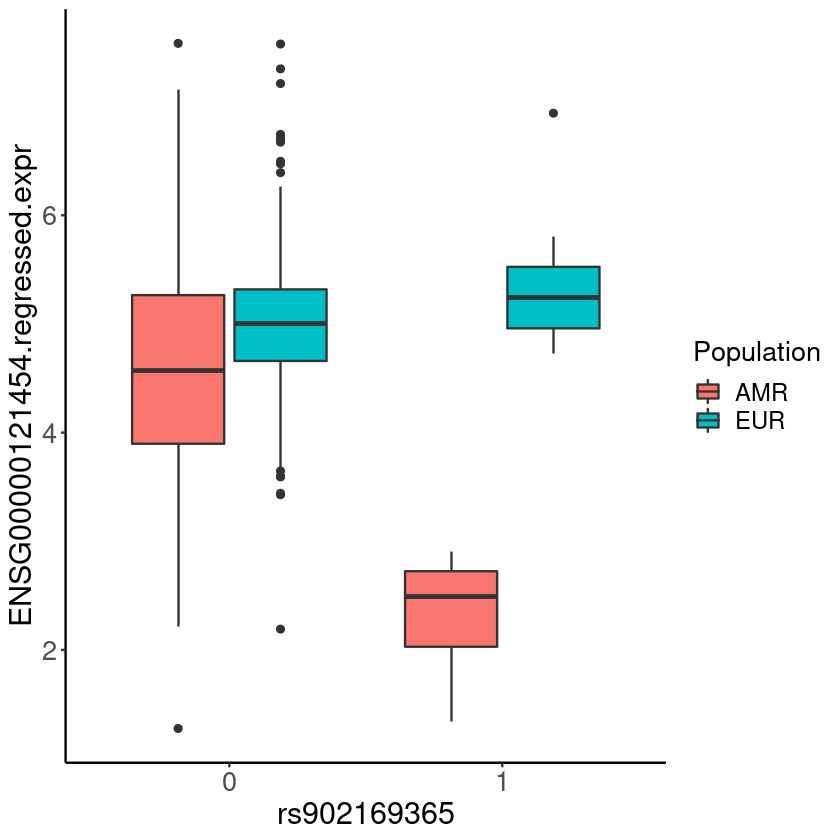

In [31]:
ggplot(df, aes(x = rs902169365, y = ENSG00000121454.regressed.expr, fill = Population)) +
geom_boxplot() +
theme_classic() +
theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.title = element_text(size = 16))

**Remove low MAC variants**
- keep only variants with MAC>10 in both EUR and AMR

In [16]:
eur_mac_10 <- fread("../../genotype/all_data/isec_R2_greater_than_3/ancestry/eur/filtered.hg19.sorted.removeGeneOutlier.mac10.bim", data.table = F)

In [17]:
amr_mac_10 <- fread("../../genotype/all_data/isec_R2_greater_than_3/ancestry/amr/filtered.hg19.sorted.removeGeneOutlier.mac10.bim", data.table = F)

In [106]:
eur_amr_mac_10 <- eur_mac_10 %>% inner_join(amr_mac_10, by = "V2")
dim(eur_amr_mac_10)

[1] 4787693      11

In [19]:
sum(test$sid.x %in% eur_amr_mac_10$V2)

[1] 5

In [107]:
eur_amr_mac_10 <- eur_amr_mac_10 %>% filter(V5.x == V5.y, V6.x == V6.y)
dim(eur_amr_mac_10)

[1] 4765942      11

In [108]:
length(unique(amr_eur$sid.x))
sum(unique(amr_eur$sid.x) %in% eur_amr_mac_10$V2)

[1] 2620

[1] 2264

In [109]:
amr_eur_mac_10 <- amr_eur %>% filter(sid.x %in% eur_amr_mac_10$V2)

`geom_smooth()` using formula 'y ~ x'



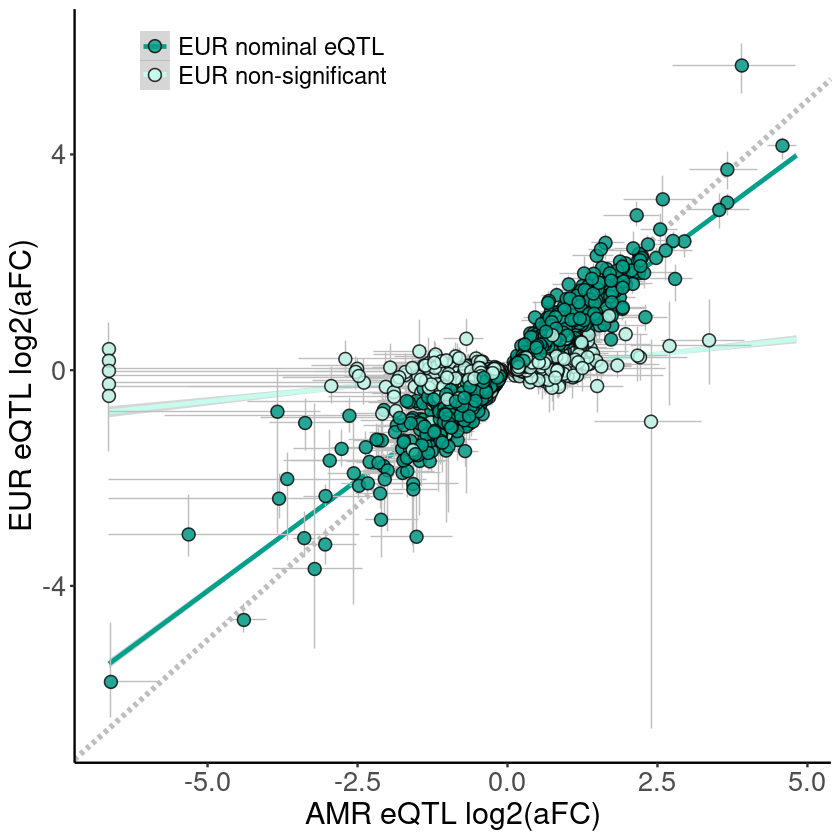

In [110]:
ggplot(amr_eur_mac_10, aes(x = log2_aFC.x, y = log2_aFC.y)) +
    geom_abline(intercept = 0, slope = 1, color = "grey", linetype = "dashed", size = 1.2) +
    geom_smooth(method = "lm", fullrange = TRUE, aes(color = sig)) +
    geom_pointrange(aes(xmin = log2_aFC_lower.x, xmax = log2_aFC_upper.x), 
                  colour = "grey", size = .3) +
    geom_pointrange(aes(ymin = log2_aFC_lower.y, ymax = log2_aFC_upper.y), 
                  colour = "grey", size = .3) +
    geom_point(size = 3, aes(fill = sig), alpha = 0.8, shape = 21) +
    labs(x = "AMR eQTL log2(aFC)", y = "EUR eQTL log2(aFC)") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.position = c(0.25, 0.95)) +
    scale_color_manual(values = cols, name = "") +
    scale_fill_manual(values = cols, name = "")

In [111]:
ggsave("../figures/amr_eur_aFC.pdf", height = 6, width = 6)

`geom_smooth()` using formula 'y ~ x'



In [112]:
# this is not restricting to EUR nominal sig 
cor.test(x = amr_eur_mac_10$log2_aFC.x, y = amr_eur_mac_10$log2_aFC.y, method = 'spearman')
# EUR nominal sig
cor.test(x = amr_eur_mac_10[amr_eur_mac_10$sig == "EUR nominal eQTL", 'log2_aFC.x'], 
         y = amr_eur_mac_10[amr_eur_mac_10$sig == "EUR nominal eQTL", 'log2_aFC.y'], 
         method = 'spearman')

Warning message in cor.test.default(x = amr_eur_mac_10$log2_aFC.x, y = amr_eur_mac_10$log2_aFC.y, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  amr_eur_mac_10$log2_aFC.x and amr_eur_mac_10$log2_aFC.y
S = 249282181, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8869295 



	Spearman's rank correlation rho

data:  amr_eur_mac_10[amr_eur_mac_10$sig == "EUR nominal eQTL", "log2_aFC.x"] and amr_eur_mac_10[amr_eur_mac_10$sig == "EUR nominal eQTL", "log2_aFC.y"]
S = 16668902, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9745954 


In [120]:
amr_eur_mac_10 %>% filter(log2_aFC.x < -5)

gene_qtl,pid.x,sid.x,log2_aFC.x,log2_aFC_lower.x,log2_aFC_upper.x,log2_aFC.y,log2_aFC_lower.y,log2_aFC_upper.y,sig
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000170549:rs75455885,ENSG00000170549,rs75455885,-6.643856,-6.643856,-6.643856,-0.25947120,-0.60806848,0.10743401,EUR non-significant
ENSG00000008197:rs17665639,ENSG00000008197,rs17665639,-6.643856,-6.643856,-6.643856,0.39009463,0.03051849,0.87759801,EUR non-significant
ENSG00000137573:rs62512190,ENSG00000137573,rs62512190,-6.643856,-6.643856,-6.643856,0.17553229,-0.15277599,0.52637073,EUR non-significant
ENSG00000272679:rs77672405,ENSG00000272679,rs77672405,-6.643856,-6.643856,-6.643856,-0.47743066,-1.50180142,0.06471152,EUR non-significant
ENSG00000257069:rs113767925,ENSG00000257069,rs113767925,-6.643856,-6.643856,-6.643856,-0.01367548,-0.32803508,0.24542674,EUR non-significant
ENSG00000244257:rs2007413,ENSG00000244257,rs2007413,-5.315030,-6.643856,-2.475510,-3.04610371,-3.45621185,-2.30156914,EUR nominal eQTL
ENSG00000214425:rs2732666,ENSG00000214425,rs2732666,-6.611287,-6.643856,-5.796610,-5.78020419,-6.44799327,-4.68710040,EUR nominal eQTL


In [123]:
eur_afr_mac_10 %>% filter(V2 %in% c("rs75455885", "rs17665639", "rs62512190", "rs77672405", "rs113767925"))

V1.x,V2,V3.x,V4.x,V5.x,V6.x,V1.y,V3.y,V4.y,V5.y,V6.y
<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
5,rs75455885,0,3321391,C,G,5,0,3321391,C,G
8,rs62512190,0,70562585,A,G,8,0,70562585,A,G
9,rs77672405,0,139444265,T,C,9,0,139444265,T,C
11,rs113767925,0,64776632,C,T,11,0,64776632,C,T


### 2-1-2: Reverse effect points
- ignore below. Fixed above

In [113]:
# # do the reverse log2aFC QTLs also having reverse beta?
# # note here EUR aFC CIs are slightly different than those in eur_afc_all 
# reverse <- amr_eur %>% filter(log2_aFC.x * log2_aFC.y < 0, sig == "EUR nominal eQTL")
# reverse <- reverse %>% left_join(amr, by = "gene_qtl") %>% left_join(eur_afc_sig, by = "gene_qtl")
# head(reverse)

In [27]:
# write.table(data.frame(unique(reverse$sid)), "../results/amr_nominal_15HCP/eur_amr_reverse_afc_sid.txt",
#            col.names = F, row.names = F, quote = F, sep = "\t")

**Most off diagonal variants have filpped REF/ALT between EUR and AMR**
- `awk 'FNR==NR{a[$1]=$1; next}; $2 in a {print}' eur_amr_reverse_afc_sid.txt ~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/eur/filtered.hg19.sorted.bim > reverse_sid_eur.txt`
- `awk 'FNR==NR{a[$1]=$1; next}; $2 in a {print}' eur_amr_reverse_afc_sid.txt ~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/amr/filtered.hg19.sorted.bim > reverse_sid_amr.txt`
- the 6 unmatched alleles in populations, e.g. `chr16:75551646` somehow after `crossmap_ancestry` the allels were changed in AMR
- should have kept allele order

In [22]:
# eur_sid <- read.table("../results/amr_nominal_15HCP/reverse_sid_eur.txt")
# amr_sid <- read.table("../results/amr_nominal_15HCP/reverse_sid_amr.txt")

In [114]:
# eur_amr_sid <- eur_sid %>% left_join(amr_sid, by = "V2")
# head(eur_amr_sid)

In [115]:
# dim(eur_amr_sid)
# sum(eur_amr_sid$V5.x == eur_amr_sid$V6.y)
# sum(eur_amr_sid$V6.x == eur_amr_sid$V5.y)

**Reverse log2aFC for swapped alleles variants**

In [25]:
# eur_amr_mac_10_swap <- eur_amr_mac_10 %>% filter(V5.x == V6.y, V6.x == V5.y)

In [116]:
# eur_amr_mac_10_consistent <- eur_amr_mac_10 %>% filter(V5.x == V5.y, V6.x == V6.y)
# dim(eur_amr_mac_10_consistent)

In [117]:
# # somehow after crossmap alleles were changed
# head(eur_amr_mac_10 %>% filter(!V2 %in% eur_amr_mac_10_swap$V2, !V2 %in% eur_amr_mac_10_consistent$V2))

In [118]:
# for (i in 1:nrow(amr_eur_mac_10)) {
#     if (amr_eur_mac_10[i,'sid.x'] %in% eur_amr_mac_10_swap$V2) {
#         amr_eur_mac_10[i,'log2_aFC.y'] <- -amr_eur_mac_10[i,'log2_aFC.y']
#         amr_eur_mac_10[i,'log2_aFC_lower.y'] <- -amr_eur_mac_10[i,'log2_aFC_lower.y']
#         amr_eur_mac_10[i,'log2_aFC_upper.y'] <- -amr_eur_mac_10[i,'log2_aFC_upper.y']
#     }
# }

In [119]:
# ggplot(amr_eur_mac_10, aes(x = log2_aFC.x, y = log2_aFC.y)) +
#     geom_abline(intercept = 0, slope = 1, color = "grey", linetype = "dashed", size = 1.2) +
#     geom_smooth(method = "lm", fullrange = TRUE, aes(color = sig)) +
#     geom_pointrange(aes(xmin = log2_aFC_lower.x, xmax = log2_aFC_upper.x), 
#                   colour = "grey", size = .3) +
#     geom_pointrange(aes(ymin = log2_aFC_lower.y, ymax = log2_aFC_upper.y), 
#                   colour = "grey", size = .3) +
#     geom_point(size = 3, aes(fill = sig), alpha = 0.8, shape = 21) +
#     labs(x = "AMR eQTL log2(aFC)", y = "EUR eQTL log2(aFC)") +
#     theme_classic() +
#     theme(axis.text = element_text(size = 16),
#           axis.title = element_text(size = 18),
#           legend.text = element_text(size = 14),
#           legend.position = c(0.25, 0.95)) +
#     scale_color_manual(values = cols, name = "") +
#     scale_fill_manual(values = cols, name = "") +
#     scale_x_continuous(breaks=seq(-5,5,2.5)) +
#     scale_y_continuous(breaks=seq(-5,5,2.5))

### 2-2: AFR-EUR

In [50]:
afr <- afr %>% unite("gene_qtl", pid, sid, sep = ":", remove = FALSE)
afr_afc <- afr_afc %>% unite("gene_qtl", pid, sid, sep = ":")
sum(unique(afr$gene_qtl) %in% unique(afr_afc$gene_qtl)) # all perm eQTL are nom sig
length(unique(afr$gene_qtl))

[1] 1876

[1] 1876

In [51]:
afr_afc <- afr_afc %>% filter(gene_qtl %in% afr$gene_qtl)
dim(afr_afc)

[1] 1876   10

In [57]:
eur_afc_all_afr <- eur_afc_all %>% filter(gene_qtl %in% afr_afc$gene_qtl)
dim(eur_afc_all_afr)

[1] 1350    8

In [58]:
eur_afc_all_afr <- eur_afc_all_afr %>% mutate(sig = ifelse(gene_qtl %in% eur_afc_sig$gene_qtl,
                                                           "EUR nominal eQTL", "EUR non-significant"))
table(eur_afc_all_afr$sig)


   EUR nominal eQTL EUR non-significant 
                857                 493 

In [85]:
afr_eur <- afr_afc %>% 
select(gene_qtl, log2_aFC, log2_aFC_lower, log2_aFC_upper) %>%
inner_join(eur_afc_all_afr, by = "gene_qtl") %>% 
select(gene_qtl, sid, log2_aFC.x, log2_aFC_lower.x, log2_aFC_upper.x, 
       log2_aFC.y, log2_aFC_lower.y, log2_aFC_upper.y, sig)

cols.num <- c("log2_aFC.x", "log2_aFC_lower.x", "log2_aFC_upper.x",
              "log2_aFC.y", "log2_aFC_lower.y", "log2_aFC_upper.y")
afr_eur[cols.num] <- sapply(afr_eur[cols.num],as.numeric)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 21 rows containing missing values (geom_segment).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”


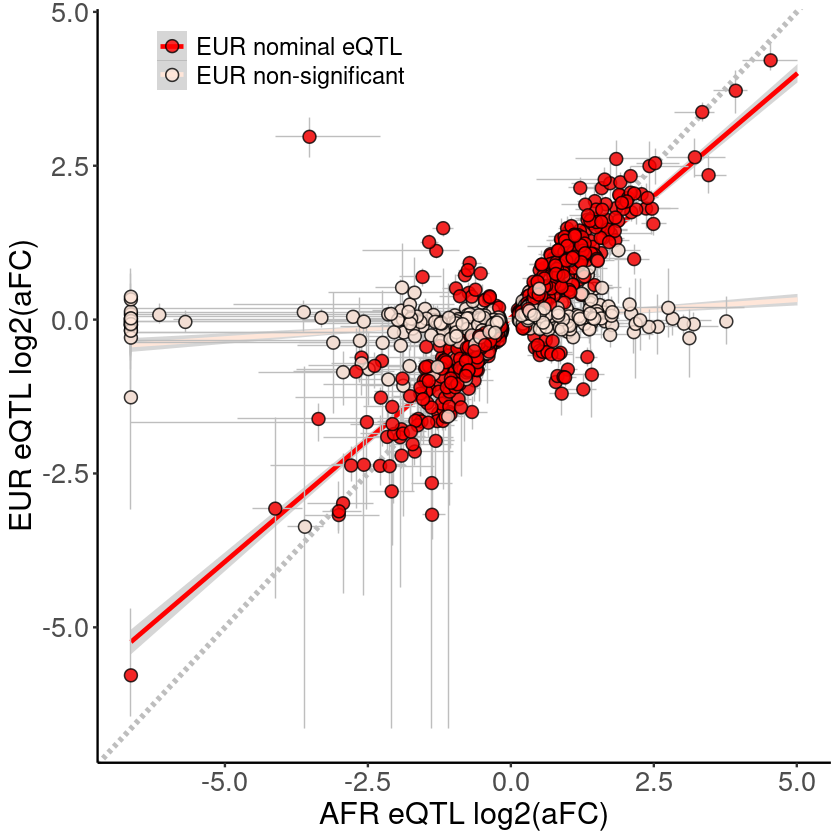

In [39]:
cols <- c("EUR nominal eQTL" = "#FF0000",
          "EUR non-significant" = "#FFE6D9")

ggplot(afr_eur, aes(x = log2_aFC.x, y = log2_aFC.y)) +
    geom_abline(intercept = 0, slope = 1, color = "grey", linetype = "dashed", size = 1.2) +
    geom_smooth(method = "lm", fullrange = TRUE, aes(color = sig)) +
    geom_pointrange(aes(xmin = log2_aFC_lower.x, xmax = log2_aFC_upper.x), 
                  colour = "grey", size = .3) +
    geom_pointrange(aes(ymin = log2_aFC_lower.y, ymax = log2_aFC_upper.y), 
                  colour = "grey", size = .3) +
    geom_point(size = 3, aes(fill = sig), alpha = 0.8, shape = 21) +
    labs(x = "AFR eQTL log2(aFC)", y = "EUR eQTL log2(aFC)") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.position = c(0.25, 0.95)) +
    scale_color_manual(values = cols, name = "") +
    scale_fill_manual(values = cols, name = "")

In [40]:
afr_mac_10 <- fread("../../genotype/all_data/isec_R2_greater_than_3/ancestry/afr/filtered.hg19.sorted.removeGeneOutlier.mac10.bim", data.table = F)

In [41]:
eur_afr_mac_10 <- eur_mac_10 %>% inner_join(afr_mac_10, by = "V2")
dim(eur_afr_mac_10)

[1] 4266183      11

In [84]:
# removing variants with flipped alleles, and variants somehow with different alleles after crossmap
eur_afr_mac_10 <- eur_afr_mac_10 %>% filter(V5.x == V5.y, V6.x == V6.y)
dim(eur_afr_mac_10)

[1] 4221713      11

In [86]:
length(unique(afr_eur$sid))
sum(unique(afr_eur$sid) %in% eur_afr_mac_10$V2)
afr_eur_mac_10 <- afr_eur %>% filter(sid %in% eur_afr_mac_10$V2)

[1] 1291

[1] 1046

`geom_smooth()` using formula 'y ~ x'



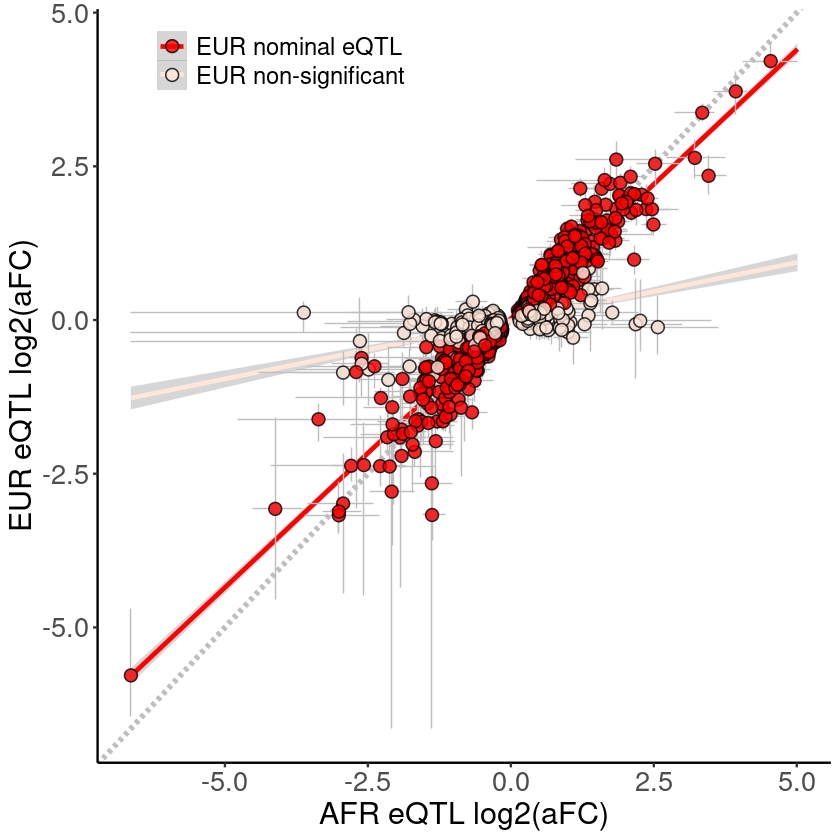

In [87]:
ggplot(afr_eur_mac_10, aes(x = log2_aFC.x, y = log2_aFC.y)) +
    geom_abline(intercept = 0, slope = 1, color = "grey", linetype = "dashed", size = 1.2) +
    geom_smooth(method = "lm", fullrange = TRUE, aes(color = sig)) +
    geom_pointrange(aes(xmin = log2_aFC_lower.x, xmax = log2_aFC_upper.x), 
                  colour = "grey", size = .3) +
    geom_pointrange(aes(ymin = log2_aFC_lower.y, ymax = log2_aFC_upper.y), 
                  colour = "grey", size = .3) +
    geom_point(size = 3, aes(fill = sig), alpha = 0.8, shape = 21) +
    labs(x = "AFR eQTL log2(aFC)", y = "EUR eQTL log2(aFC)") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.text = element_text(size = 14),
          legend.position = c(0.25, 0.95)) +
    scale_color_manual(values = cols, name = "") +
    scale_fill_manual(values = cols, name = "")

In [88]:
ggsave("../figures/afr_eur_aFC.pdf", height = 6, width = 6)

`geom_smooth()` using formula 'y ~ x'



In [89]:
# this is not restricting to EUR nominal sig 
cor.test(x = afr_eur_mac_10$log2_aFC.x, y = afr_eur_mac_10$log2_aFC.y, method = 'spearman')
# EUR nominal sig
cor.test(x = afr_eur_mac_10[afr_eur_mac_10$sig == "EUR nominal eQTL", 'log2_aFC.x'], 
         y = afr_eur_mac_10[afr_eur_mac_10$sig == "EUR nominal eQTL", 'log2_aFC.y'], 
         method = 'spearman')


	Spearman's rank correlation rho

data:  afr_eur_mac_10$log2_aFC.x and afr_eur_mac_10$log2_aFC.y
S = 20223932, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9083336 



	Spearman's rank correlation rho

data:  afr_eur_mac_10[afr_eur_mac_10$sig == "EUR nominal eQTL", "log2_aFC.x"] and afr_eur_mac_10[afr_eur_mac_10$sig == "EUR nominal eQTL", "log2_aFC.y"]
S = 2354266, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9707989 


### 2-3: Add non-sig to EUR aFC
- Make aFC QTL input file for EUR, all AMR, AFR permutation eQTL. Then can filter for EUR nominal eQTL by matching with EUR significant_assoc file. Also need to remove variants that are not in EUR
- check if aFC are the same as previous run (update: yes. CI is slightly different)

In [20]:
df <- rbind(amr, afr)

In [21]:
dim(df)
length(unique(df$gene_qtl))

[1] 5118   14

[1] 4951

In [22]:
df <- df %>% select(gene_qtl, pid, sid)
df <- df[!duplicated(df$gene_qtl),]
dim(df)

[1] 4951    3

In [14]:
eur_bim <- fread("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/eur/filtered.hg19.sorted.bim", data.table = F)
head(eur_bim)
head(df)

,V1,V2,V3,V4,V5,V6
,<int>,<chr>,<int>,<int>,<chr>,<chr>
1,1,rs61769339,0,662622,A,G
2,1,rs12238997,0,693731,G,A
3,1,rs61769351,0,693823,C,G
4,1,rs142559957,0,704637,A,G
5,1,rs58276399,0,731718,C,T
6,1,rs61770163,0,732032,C,A


,gene_qtl,pid,sid
,<chr>,<chr>,<chr>
1,ENSG00000000460:rs12064636,ENSG00000000460,rs12064636
2,ENSG00000001460:rs4592213,ENSG00000001460,rs4592213
3,ENSG00000001461:rs527567,ENSG00000001461,rs527567
4,ENSG00000001630:rs12531966,ENSG00000001630,rs12531966
5,ENSG00000002016:rs147560086,ENSG00000002016,rs147560086
6,ENSG00000002549:chr4:17605580,ENSG00000002549,chr4:17605580


In [23]:
length(unique(df$sid))

[1] 4746

In [74]:
sum(unique(df$sid) %in% eur_bim$V2)

[1] 3763

In [24]:
test <- df %>% inner_join(eur_bim, by = c("sid"="V2"))
dim(test)

[1] 3933    8

In [25]:
df <- df %>% left_join(eur_bim, by = c("sid"="V2"))
head(df)

,gene_qtl,pid,sid,V1,V3,V4,V5,V6
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,ENSG00000000460:rs12064636,ENSG00000000460,rs12064636,1,0,169807621,C,T
2,ENSG00000001460:rs4592213,ENSG00000001460,rs4592213,1,0,24741819,G,A
3,ENSG00000001461:rs527567,ENSG00000001461,rs527567,1,0,24711120,C,G
4,ENSG00000001630:rs12531966,ENSG00000001630,rs12531966,7,0,91765840,G,A
5,ENSG00000002016:rs147560086,ENSG00000002016,rs147560086,12,0,1054956,T,C
6,ENSG00000002549:chr4:17605580,ENSG00000002549,chr4:17605580,4,0,17607203,TA,T


In [26]:
length(unique(df$sid))

[1] 4746

In [18]:
sum(complete.cases(df))

[1] 3933

In [27]:
df <- df[complete.cases(df),]
dim(df)
length(unique(df$gene_qtl))
length(unique(df$sid))

[1] 3933    8

[1] 3933

[1] 3763

In [28]:
df <- df %>% select(pid, sid, V1, V4)
colnames(df)[3:4] <- c("sid_chr", "sid_pos")
head(df)

,pid,sid,sid_chr,sid_pos
,<chr>,<chr>,<int>,<int>
1,ENSG00000000460,rs12064636,1,169807621
2,ENSG00000001460,rs4592213,1,24741819
3,ENSG00000001461,rs527567,1,24711120
4,ENSG00000001630,rs12531966,7,91765840
5,ENSG00000002016,rs147560086,12,1054956
6,ENSG00000002549,chr4:17605580,4,17607203


In [29]:
write.table(df, "../results/eur_nominal_50HCP/amr_afr_perm_eqtl_in_eur_aFC.txt", col.names = T, row.names = F, quote = F, sep = "\t")